In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.system("curl -O https://raw.githubusercontent.com/valschi/PUI2017_vjs306/master/"+
          "HW6_vjs306/rawfiles/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

os.system("mv " + "Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv " + os.getenv("PUIDATA") +
          "/Energy_Water_Data.csv ")

os.system("curl -O https://raw.githubusercontent.com/valschi/PUI2017_vjs306/master/"+
          "HW6_vjs306/rawfiles/MN.csv")

os.system("mv " + "MN.csv " + os.getenv("PUIDATA"))

0

In [3]:
nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + "Energy_Water_Data.csv")
bsize = pd.read_csv(os.getenv("PUIDATA") + "/" + "MN.csv")

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,22,23,25,63,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
nrg.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [6]:
bsize.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5.0,1018.0,2.0,1.0,10004.0,E007,...,190225.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,190636.0,16a,Y,199 999,10101.0,NaN,0.0,NaN,1,16V2
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,193648.0,12b,NaN,199 999,10101.0,NaN,0.0,NaN,1,16V2
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,199 999,10101.0,NaN,0.0,NaN,4,16V2
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,12b,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,16V2


In [7]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

As we discussed, coming up with a sensible model generally requires domain expertise. However, if the data you are investigating shows "obvious patterns", for example if two of the variable look like a line when plotted one against the other, then those patterns (correlations) may help you finding reasonable models for the data.

Explore your data, starting with a scatter matrix. A scatter matrix is a plot of all variables in your data against all other variables: each pair of variables is a subplot in the plot matrix. The diagonal line then would be a plot of a variable against itself, which is useless, so it is usually substituted by a histogram of that variable (or sometimes a KDE, which is basically a smooth histogram).

## exploratory analysis

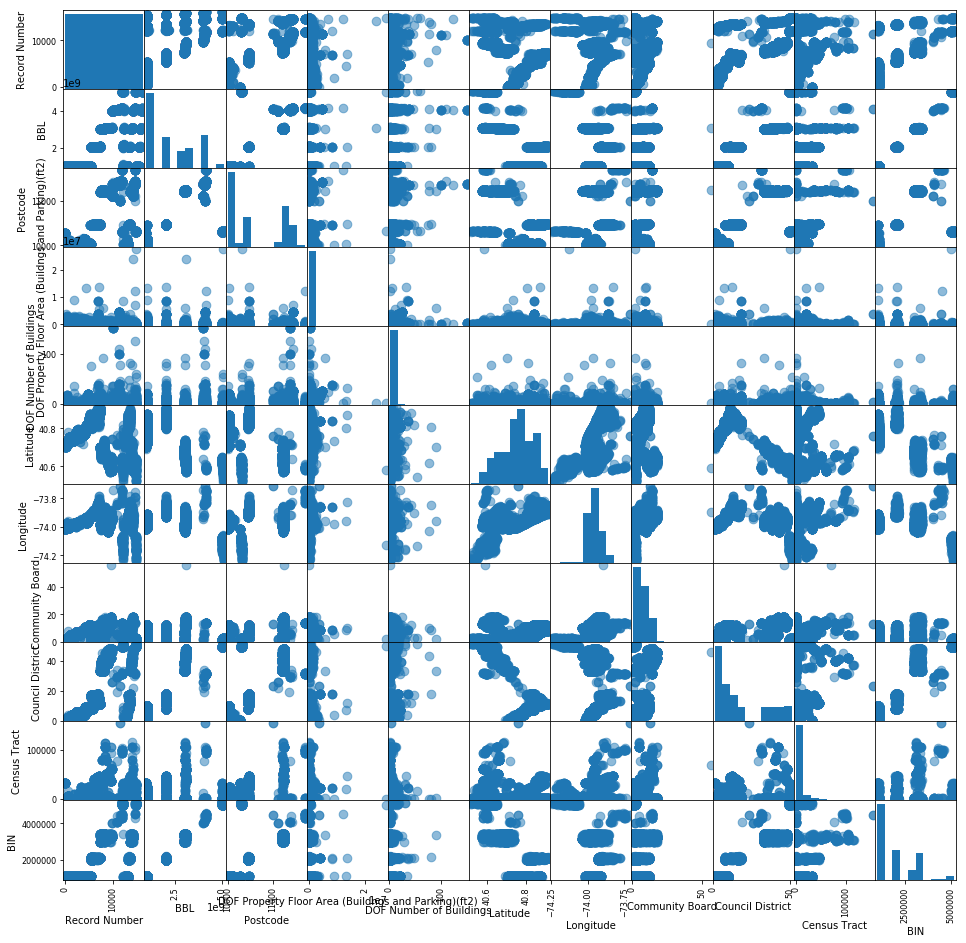

In [8]:
#try make a scatter plot of nrg. Few columns will plot - only those that have numerical values. 
#Pandas will ignore the other ones

from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16));

Figure 1 : Scatter Matrix of all the columns vs all of them, this is for both of the dataframes

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: I need to remove all values that cannot convert to float in order to use the columns and convert them to float arrays and do math with them.

You can use pd.to_numeric() which is a function that transforms values to float (when possible). The default behavior of this function is to throw an error if it encounters a value that it cannot convert. That behavior can be modified with the "error" keyword, by setting it to "coerce". Please look at the function documentation to understand the syntax.

__Valeria's comments' : the above scatter matrix is massive. We can distinguish the histograms along the diagonal line. Indeed after a while of reviewing the columns plotted we can affirm the Site EUI(kBtu/ft2) is missing from this first scatter matrix__

In [10]:
#moving on ...
nrg["Site EUI(kBtu/ft2)"] = pd.to_numeric(nrg["Site EUI(kBtu/ft2)"], errors='coerce');
nrg['Property ft2'] = pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')
#print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#bsize.BBL.astype(float)

In [11]:
# easier to create a new dataframe only with the interesting columns than dropping most of them:
nrg = nrg[['BBL','Site EUI(kBtu/ft2)','Property ft2']]
bsize = bsize[['UnitsRes','UnitsTotal','YearBuilt','BBL']]

In [12]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Property ft2
0,1.000410e+09,NaN,918919.0
1,4.021460e+09,NaN,NaN
2,2.027620e+09,NaN,64200.0
3,1.006700e+09,NaN,NaN
4,2.048300e+09,NaN,50000.0


In [13]:
bsize.head()

,UnitsRes,UnitsTotal,YearBuilt,BBL
0,0,0,1900,1.000010e+09
1,0,0,1900,1.000010e+09
2,0,0,1900,1.000010e+09
3,0,0,0,1.000010e+09
4,0,0,0,1.000010e+09


In [14]:
(bsize.BBL.values[0]), (nrg.BBL.values[0])

(1000010010.0, 1000410001.0)

In [15]:
bblnrgdata = pd.merge(nrg, bsize, on='BBL').dropna()
bblnrgdata.shape

(5085, 6)

In [16]:
bblnrgdata.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)', u'Property ft2', u'UnitsRes',
       u'UnitsTotal', u'YearBuilt'],
      dtype='object')

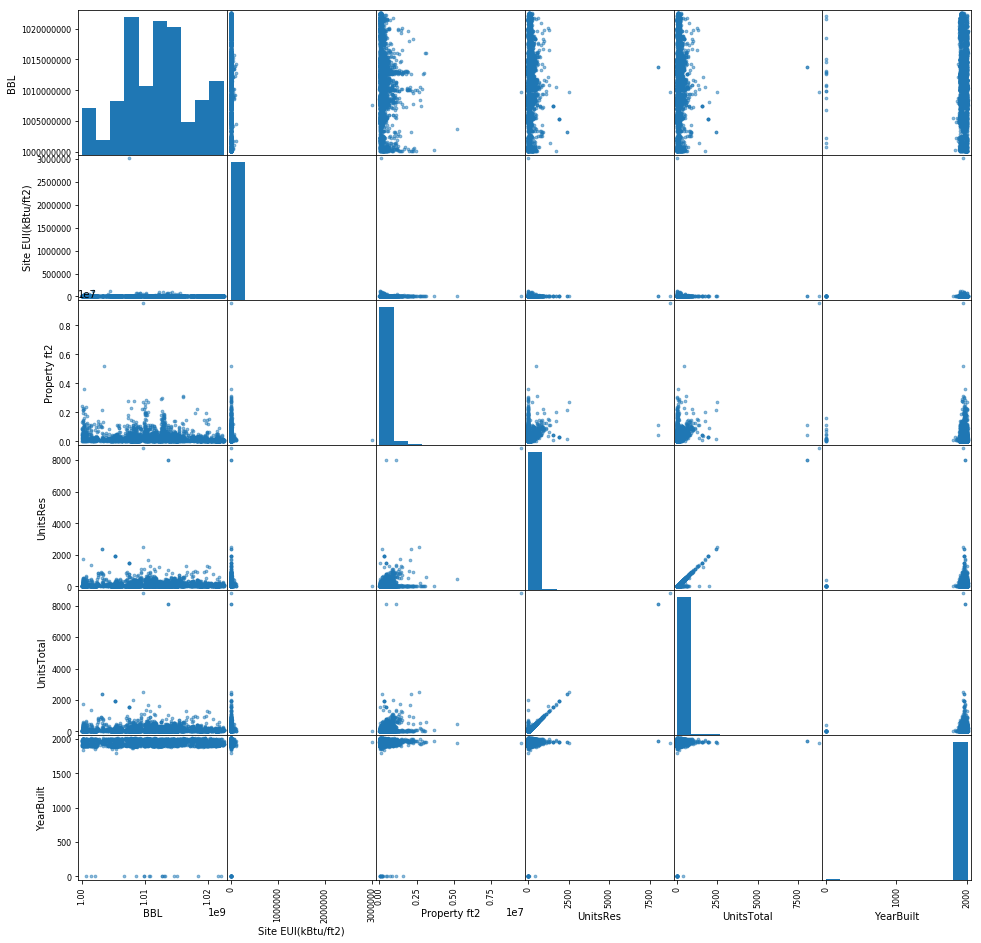

In [17]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16));

Figure2: Cleaned up scatter matrix. I am starting to prepare the data I will use. This is YearBuilt, Energy per unit (kBtu/ft2), sqft per property and the total number of units and residential units

Once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. __Energy TOTAL, not per sq ft...__ Here you can choose what you think makes more sense for the number of units: all units, residential units...

__Make a scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000.__

In [18]:
#Obtaining the total energy per building. In order to do this we multiply the energy times the sqft
bblnrgdata['nrg'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Property ft2'] 
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Property ft2,UnitsRes,UnitsTotal,YearBuilt,nrg
2,1.013110e+09,125.4,330000.0,0,56,1977,41382000.0
10,1.010140e+09,154.9,841709.0,0,2,1999,130380724.1
15,1.007660e+09,122.3,59468.0,0,8,1912,7272936.4
16,1.008150e+09,117.0,364000.0,0,24,1954,42588000.0
18,1.005050e+09,82.1,235370.0,0,24,1926,19323877.0


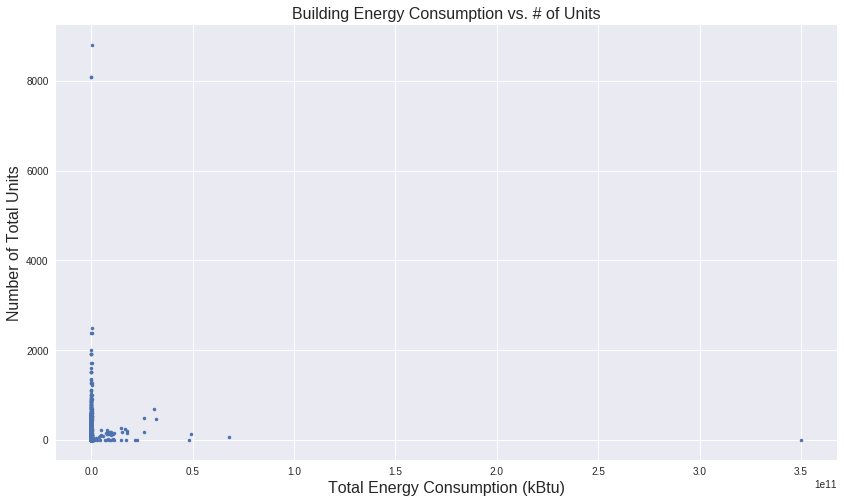

In [19]:
pl.style.use('seaborn')
pl.figure(figsize=[14,8])
pl.plot(bblnrgdata['nrg'],bblnrgdata['UnitsTotal'], '.')
pl.xlabel('Total Energy Consumption (kBtu)', size = 16)
pl.ylabel('Number of Total Units', size = 16)
pl.title('Building Energy Consumption vs. # of Units', size = 16);

Figure 3: Total number of Units vs Total Energy Consumption

Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

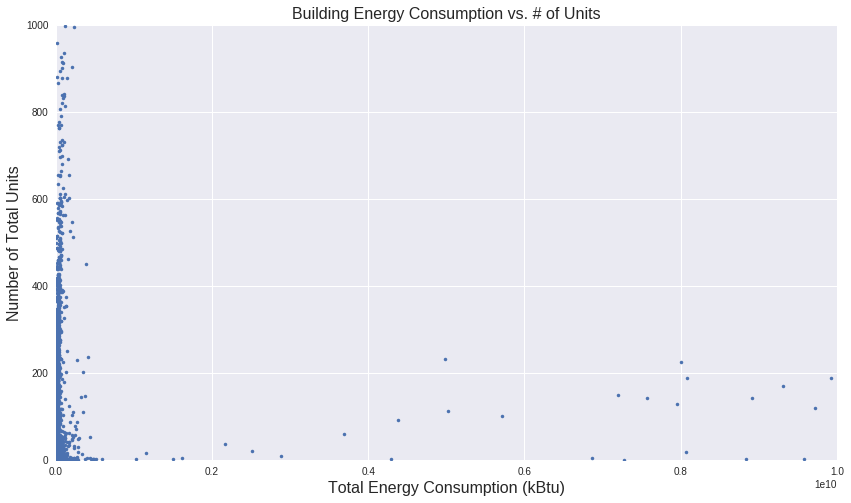

In [20]:
pl.style.use('seaborn')
pl.figure(figsize=[14,8])
pl.plot(bblnrgdata['nrg'],bblnrgdata['UnitsTotal'], '.')
pl.xlim(0,1e10)
pl.ylim(0,1000)
pl.xlabel('Total Energy Consumption (kBtu)', size = 16)
pl.ylabel('Number of Total Units', size = 16)
pl.title('Building Energy Consumption vs. # of Units', size = 16);

Figure 4: Total number of Units vs Total Energy Consumption, reduced limits for visibility

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


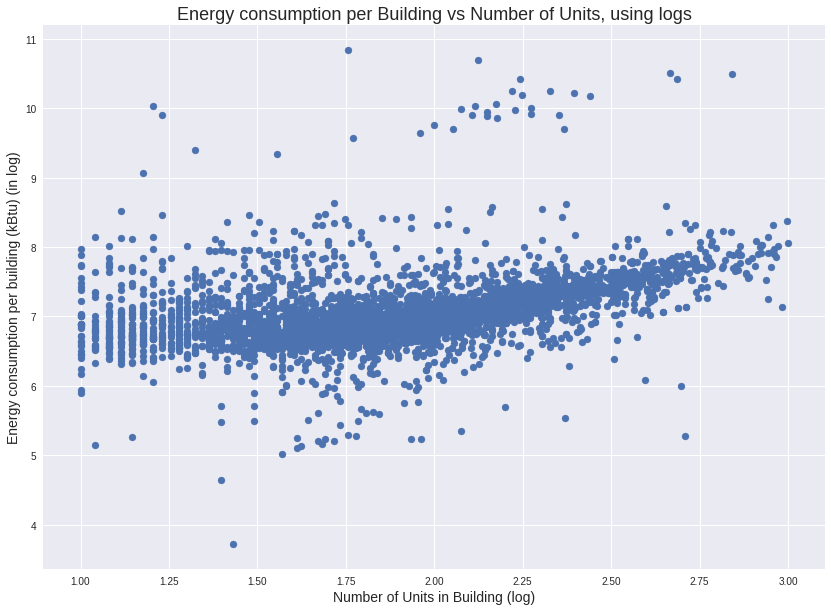

In [21]:
bblnrgdataCut = bblnrgdata[(bblnrgdata.nrg > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

pl.figure(figsize=[14,10])
pl.scatter(x=np.log10(bblnrgdataCut['UnitsTotal']), y=np.log10(bblnrgdataCut['nrg']))
pl.xlabel("Number of Units in Building (log)", fontsize=14)
pl.ylabel("Energy consumption per building (kBtu) (in log)", fontsize=14)
pl.title("Energy consumption per Building vs Number of Units, using logs", fontsize=18);

Figure 5: By applying the log we can see the scatter data between the energy per building and the number of units in the building. We can visually see a positive correlation between the two variables.

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

### BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:

xif you used statsmodels it would look something like this:

In [22]:
x = bblnrgdataCut['UnitsTotal']
y = bblnrgdataCut['nrg']
X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

lm = linmodel.fittedvalues

In [23]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.93e-166
Time:                        23:49:17   Log-Likelihood:                -2605.2
No. Observations:                4285   AIC:                             5214.
Df Residuals:                    4283   BIC:                             5227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.1089      0.033    186.025      0.000         6.045     6.173
UnitsTotal     0.4904      0.017     28.758      0.000         0.457     0.524
==============================================================================
Omnibus:                     2272.854   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43917.184
Skew:                           2.095   Prob(JB):                         0.00
Kurtosis:                      18.114   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

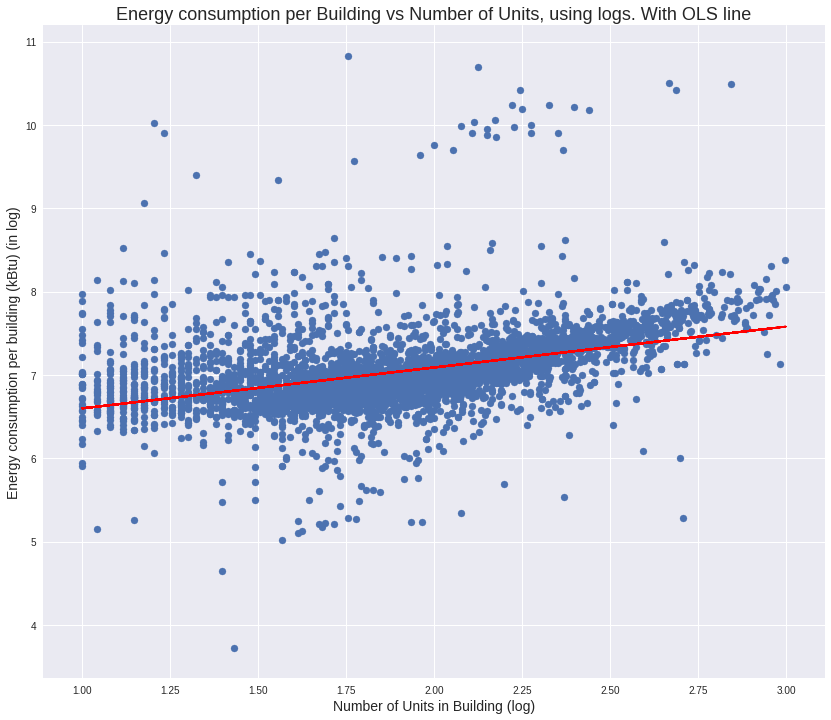

In [24]:
# Plot OLS line and scatter plot
pl.figure(figsize=[14,12])
pl.plot(np.log10(x), lm, color='red')
pl.scatter(x=np.log10(x), y=np.log10(y))

pl.xlabel("Number of Units in Building (log)", fontsize=14)
pl.ylabel("Energy consumption per building (kBtu) (in log)", fontsize=14)
pl.title("Energy consumption per Building vs Number of Units, using logs. With OLS line", fontsize=18);

Figure 6: Fitting an OLS line into the log scatter plot we can see the visual representation of the positive correlation between the two variables.

## choose which is your DEPENDENT and which is your INDEPENDENT variable.

### 1. Fit a line to Units vs Energy. (Done above)
### 2. Fit a line to Energy vs Units. (Done below)

In [25]:
# Create OLS model for opposite - energy vs. units

#I am reversing the values of 'x' and 'y' below

X2 = sm.add_constant(np.log10(y))

linmodel2 = sm.OLS(np.log10(x), X2, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

lm2 = linmodel2.fittedvalues

In [26]:
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     827.0
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          1.93e-166
Time:                        23:49:31   Log-Likelihood:                -1756.8
No. Observations:                4285   AIC:                             3518.
Df Residuals:                    4283   BIC:                             3530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.4369      0.081     -5.400      0.000        -0.596    -0.278
nrg            0.3300      0.011     28.758      0.000         0.308     0.353
==============================================================================
Omnibus:                      144.802   Durbin-Watson:                   1.387
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.337
Skew:                          -0.457   Prob(JB):                     2.51e-35
Kurtosis:                       3.241   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

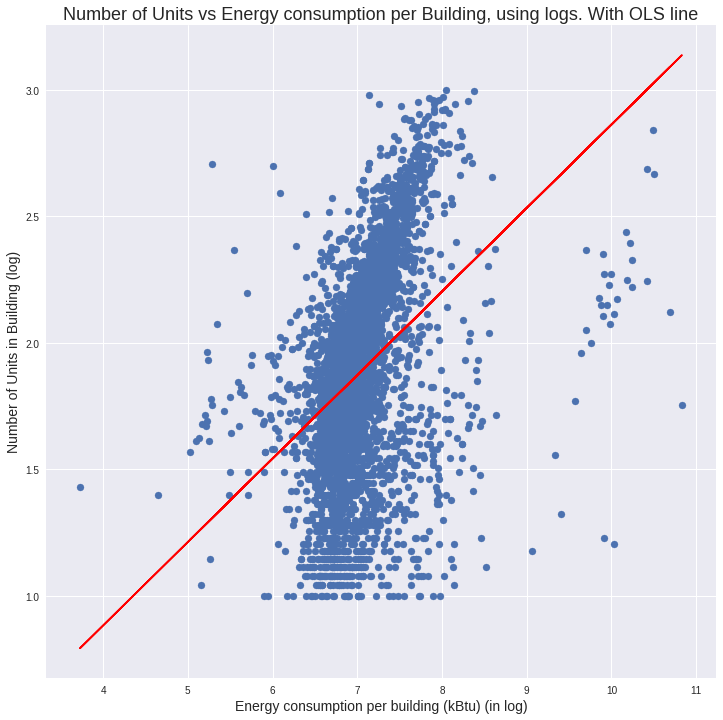

In [27]:
# plotting again:

pl.figure(figsize=[12,12])
pl.plot(np.log10(y), lm2, color='red')
pl.scatter(x=np.log10(y), y=np.log10(x))

pl.ylabel("Number of Units in Building (log)", fontsize=14)
pl.xlabel("Energy consumption per building (kBtu) (in log)", fontsize=14)
pl.title("Number of Units vs Energy consumption per Building, using logs. With OLS line", fontsize=18);



Figure 7 : OLS line of Uits vs Energy consumption. This is naturally a positive correlation with the 'complement' of the slope of the previous graph. 

### 3. Evaluate which is better by calculating the chi square. 

In [28]:
# chi2 function, from Federica's

def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1

In [29]:
## Assume that there is error in the reported energy. 
## but that is the product of two measured quantities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities

errorsnrg = np.sqrt((bblnrgdataCut['Property ft2'])**2 +(bblnrgdataCut['Site EUI(kBtu/ft2)']**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bblnrgdataCut['UnitsTotal'])

#These errors need to be propagated properly through the log's:


errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.nrg / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Assume Poisson statistics for the errors on the independent variable. Poisson statistics means your uncertainty is the square root of your measurement. I wrote down the formula for the errors. Please explain why I wrote it as I did.

#### Above we can see in calculating the total error in the reported energy, since that is the product of two quantities it's obtained by the square root from the squares of the each value..

In [30]:
print ("Chi2 for Energy vs Units: ")
(chi2(np.log10(y), lm, errorsInLogNrg))

Chi2 for Energy vs Units: 


3569797230545.2627

In [31]:
print ("Chi2 for Units vs Energy: ")
(chi2(np.log10(x), lm2, errorsInLogUnits))

Chi2 for Units vs Energy: 


491759.26037226862

__Valeria's comments: both of the above values are much larger than any values in the Chisquare table. I would assume Energy vs Units is a better fit but the large values above are just a bit unsettling.__

### 5. Fit a 2nd degree polynomial to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is  $y = ax^2 + bx + c$ .

In [32]:
# Reducing dataframe 
df2 = bblnrgdataCut[['UnitsTotal','nrg']]
df2.head()

,UnitsTotal,nrg
2,56,41382000.0
16,24,42588000.0
18,24,19323877.0
19,62,8923786.2
20,85,6484984.8


In [33]:
df2log = np.log10(df2)
df2log.head()

,UnitsTotal,nrg
2,1.748188,7.616811
16,1.380211,7.629287
18,1.380211,7.286094
19,1.792392,6.950549
20,1.929419,6.811909


In [34]:
#fit a parabola y - a*x^2 + b*x + c
import statsmodels.formula.api as smf
#np.log10

quadmodel= smf.ols(formula='nrg ~ I(UnitsTotal**2) + UnitsTotal', data = df2log)

model2 = quadmodel.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     612.9
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          8.24e-235
Time:                        23:49:49   Log-Likelihood:                -2444.1
No. Observations:                4285   AIC:                             4894.
Df Residuals:                    4282   BIC:                             4913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              8.0731      0.112     72.104      0.000         7.854     8.293
I(UnitsTotal ** 2)     0.5682      0.031     18.288      0.000         0.507     0.629
UnitsTotal            -1.6706      0.119    -14.003      0.000        -1.905    -1.437
==============================================================================
Omnibus:                     2423.017   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57853.466
Skew:                           2.219   Prob(JB):                         0.00
Kurtosis:                      20.445   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

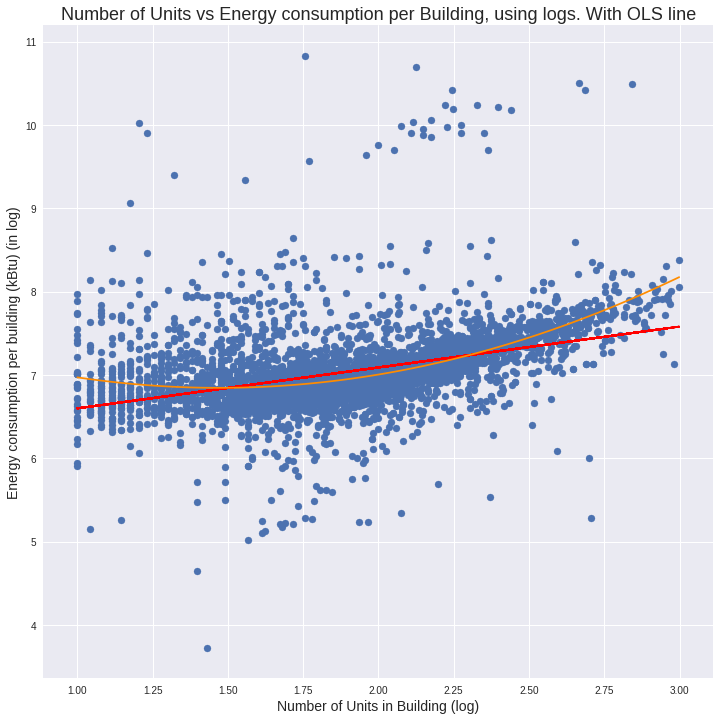

In [35]:
# Print the original scatter:
# UNITS vs ENERGY

pl.figure(figsize=[12,12])
pl.plot(np.log10(df2['UnitsTotal']), lm, color='red')
pl.scatter(x=np.log10(df2['UnitsTotal']), y=np.log10(df2['nrg']))

#Attempting the parabola:
# ax.plot(df1_.x, model2.predict(df1_), color="DarkOrange")


df2_sorted = df2log.sort_values(by='UnitsTotal')
pl.plot(df2_sorted['UnitsTotal'], model2.predict(df2_sorted), color="DarkOrange")

pl.xlabel("Number of Units in Building (log)", fontsize=14)
pl.ylabel("Energy consumption per building (kBtu) (in log)", fontsize=14)

#pl.xlim(0,100)
#pl.ylim(0,100)


pl.title("Number of Units vs Energy consumption per Building, using logs. With OLS line", fontsize=18);


Figure8: The above we can see the line model and the squared model on top of the scatter. The quadratic visually appears to 'fit' better

### 6. Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test. 

In [36]:
# Use the method compare_lr_test() of the most complex model of the 2 and 
# pass it the result of stats models for the simpler fit 
model2.compare_lr_test(linmodel)

(322.25132713540916, 4.6829415120348471e-72, 1.0)

### lr_stats, the likelihood ratio is very high (322) p value is extrremely low, and the degrees of freedom is 1.  Having DF of 1 is expected.

### Our H0 was that the polynomial model was a better fit for our data, we cannot reject this H0 at significance level of 0.05.


In [38]:
#model2.compare_lr_test?